**기본 세팅**

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")

# 1. 결정 트리

결정 트리는 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것으로 스무고개와 비슷한 개념이다.

결정 트리는 다음과 같은 노드로 구성되어 있다.

- 루트 노드(Root Node): 초기 지점으로 첫 번째 분류 규칙 노드


- 브랜치 노드(Branch Node): 자식 노드를 가지는 중간 규칙 노드로서 브랜치 노드, 리프 노드로 분리 될 수 있다.


- 리프 노드(Leaf Node): 더 이상 자식 노드가 없는 노드로서 최종 클래스 값이 결정되는 노드

여기서 규칙은 정보 균일도가 높은 데이터 셋을 먼저 선택할 수 있도록 규칙 조건을 만들며, 정보 균일도를 측정하는 대표적인 방법은 다음과 같다.

- 엔트로피 지수: 주어진 데이터 집합의 혼잡도를 의미하며 서로 다른 값이 섞여 있으면 값이 커지고, 같은 값이 섞여 있으면 값이 낮아진다.

               모든 데이터가 같은 값을 가지면 엔트로피 지수는 0이 된다.


- 지니 계수: 불평등 지수로 값이 0일때 가장 평등하고 1에 가까워질수록 불평등 해진다.

머신러닝에선 각 영역의 지니 계수가 낮은 속성을 기준으로 분할한다.

## 1.1 결정 트리 모델의 시각화

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# iris data
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 객체 생성, 학습
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [4]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot", 
                class_names= iris_data.target_names, 
                feature_names = iris_data.feature_names, 
                impurity = True,
                filled= True)

- `export_graphviz`에 학습이 완료된 `estimator`, output 파일 명, 결정 클래스 명칭 등을 입력한다.

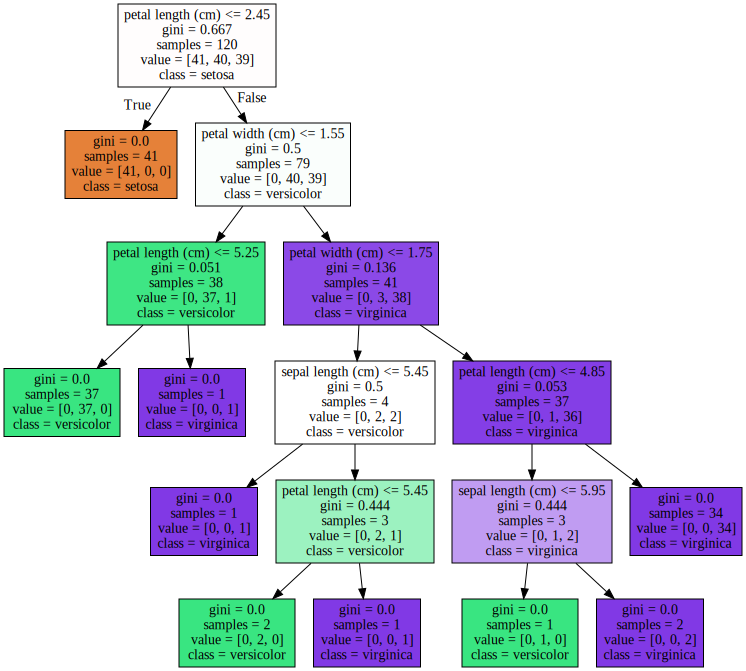

In [5]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

**Root Node**

- 첫 번째 루트 노드에는 train 데이터 샘플 120개 전체가 있고 지니 계수 및 현재 value 구성을 확인 할 수 있다.


- Petal Length <= 2.45 규칙으로 자식 노드를 생성하며 class는 하위 노드를 가질 경우 setosa가 41개로 가장 많다는 의미이다.

**Leaf Node**

- 두 번째 리프 노드는 Petal Length <= 2.45가 True인 경우로 모든 클래스가 setosa로 결정 되어 지니 계수가 0이다.

**Branch Node**

- 세 번째 브랜치 노드는 Petal Length <= 2.45가 False인 경우로 지니 계수가 0.5로 높으므로 다음 자식 브랜치 노드로 분기할 규칙이 필요하다.


- Petal Width <= 1.55 규칙으로 자식 노드를 생성한다.

**Else**

- 각 노드의 색깔은 붓꽃 데이터의 레이블 값을 의미하며 색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 의미이다.


- 네 번째 브랜치 노드를 보면 virginica가 단 1개이고, versicolr가 37개인데 이를 구분하기 위해 또 다시 자식 노드를 생성한다.


- 결정 트리는 규칙 생성 로직을 제어하지 않으면 완벽하게 클래스를 구분하기 위해 노드를 계속 생성하며 이는 과적합 문제로 이어진다.

## 1.2 결정 트리 모델의 하이퍼 파라미터

**Iris Tree 함수**

In [6]:
from sklearn.tree import export_graphviz
import graphviz

def iris_tree_hyper(max_dep = None, min_ss = 2, min_sl = 1):
    # DecisionTreeClassifier 객체 생성, 학습
    dt_clf = DecisionTreeClassifier(random_state = 156, 
                                    max_depth = max_dep, 
                                    min_samples_split = min_ss, 
                                    min_samples_leaf = min_sl
                                    )
    dt_clf.fit(X_train, y_train)

    # Graphviz 출력 파일 생성 및 리드
    export_graphviz(dt_clf, out_file="tree.dot", 
                    class_names= iris_data.target_names, 
                    feature_names = iris_data.feature_names, 
                    impurity = True,
                    filled= True)

    with open("tree.dot") as f:
        dot_graph = f.read()

    return graphviz.Source(dot_graph)

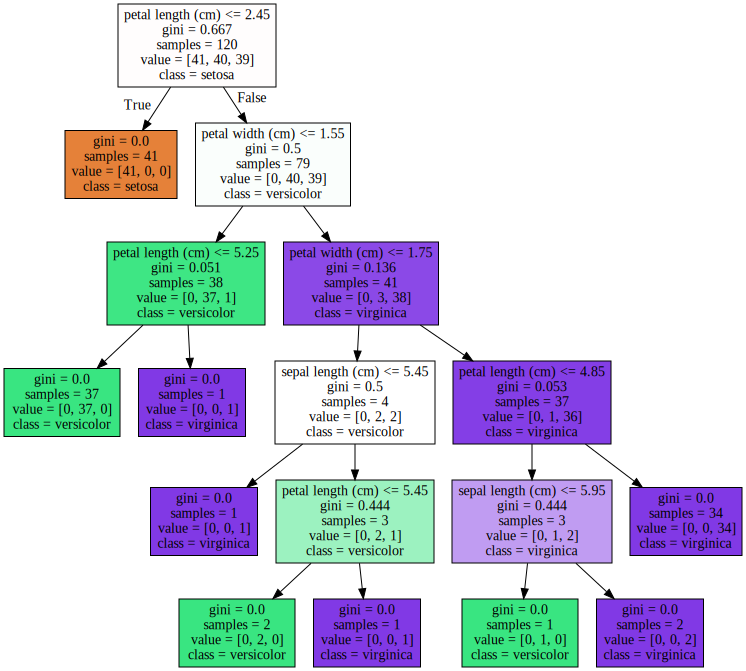

In [7]:
iris_tree_hyper()

- 하이퍼 파라미터 옵션을 디폴트로 적용하여 앞서 출력한 결과와 동일하다.

### 1.2.1 깊이 조건

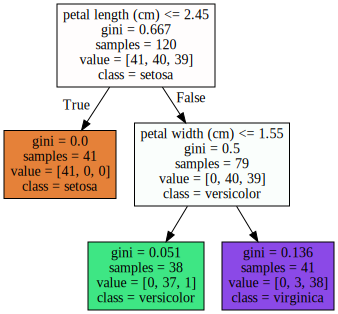

In [8]:
iris_tree_hyper(max_dep=2)

- 하이퍼 파라미터 max_depth를 2로 제한하여 더 간단한 결정 트리를 생성하였다.

### 1.2.2 최소 분할 샘플 조건

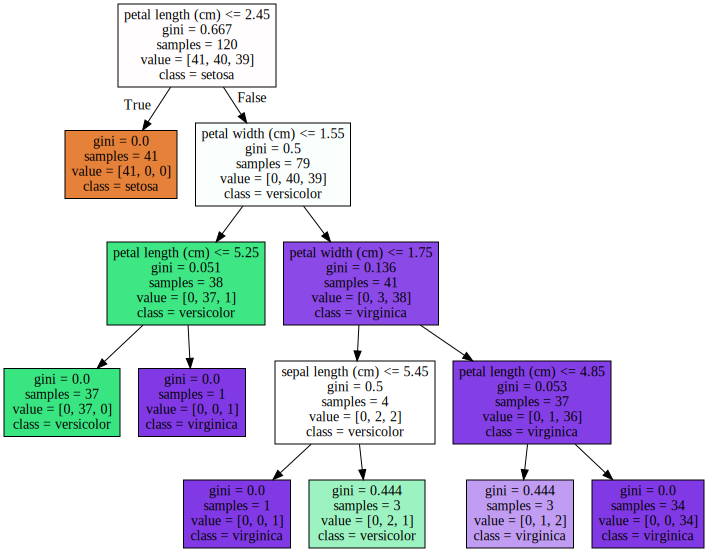

In [9]:
iris_tree_hyper(min_ss=4)

- 하이퍼 파라미터 min_samples_split을 4로 제한하여 각 노드에서 샘플이 4개 이상인 경우만 분기하도록 설정하였다.

### 1.2.3 최소 리프 샘플 조건

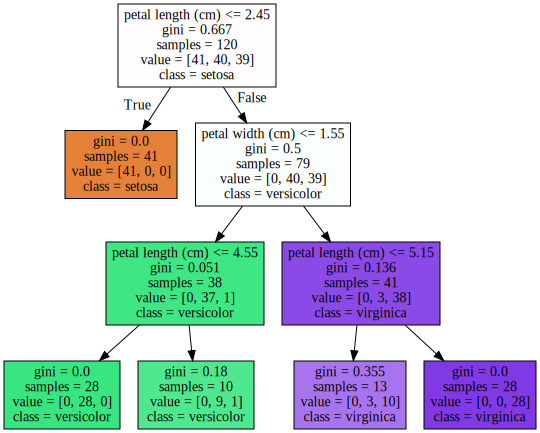

In [10]:
iris_tree_hyper(min_sl=10)

- 하이퍼 파라미터 min_samples_leaf를 10으로 제한하여 각 노드에서 샘플이 10개 이하인 경우 리프 노드가 될 수 있다.

## 1.3 피처별 중요도

# 피처별 중요도
sepal length (cm): 0.0250
sepal width (cm): 0.0000
petal length (cm): 0.5549
petal width (cm): 0.4201


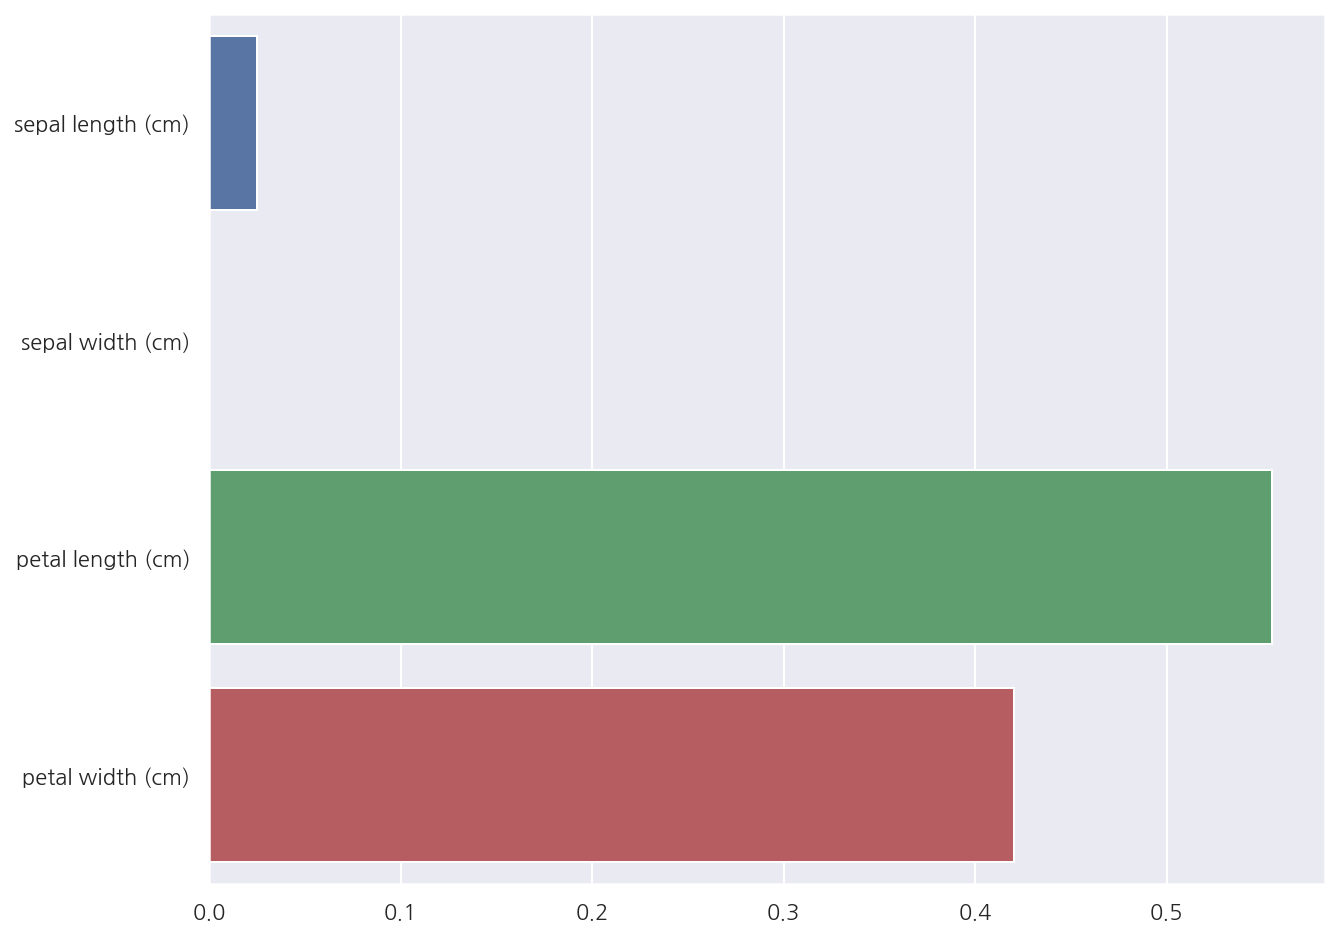

In [11]:
# 학습된 DecisionTreeClassifier 객체의 feature_importances_ 속성
feature_imp = dt_clf.feature_importances_

# 피처별 중요도
print("# 피처별 중요도")
for name, value in zip(iris_data.feature_names, feature_imp):
    print(f"{name}: {value:.4f}")
    
# 시각화
sns.barplot(x = feature_imp, y = iris_data.feature_names)
plt.show()

- Petal length가 피처 중요도가 가장 높음을 알 수 있다.

## 1.4 결정 트리 과적합

### 1.4.1 분류용 가상 데이터

**make_classification**

분류용 가상 데이터를 생성하는 `make_classification`의 인수는 다음과 같다.

- n_samples : 표본 데이터의 수, 디폴트 100


- n_features : 독립 변수의 수, 디폴트 20


- n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2


- n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2


- n_repeated : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0


- n_classes : 종속 변수의 클래스 수, 디폴트 2


- n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2


- weights : 각 클래스에 할당된 표본 수


- random_state : 난수 발생 시드

출력은 다음과 같다.

- X : [n_samples, n_features] 크기의 배열


- y : [n_samples] 크기의 배열

출처: 데이터 사이언스 스쿨: <https://datascienceschool.net/intro.html>

**가상 데이터 생성**

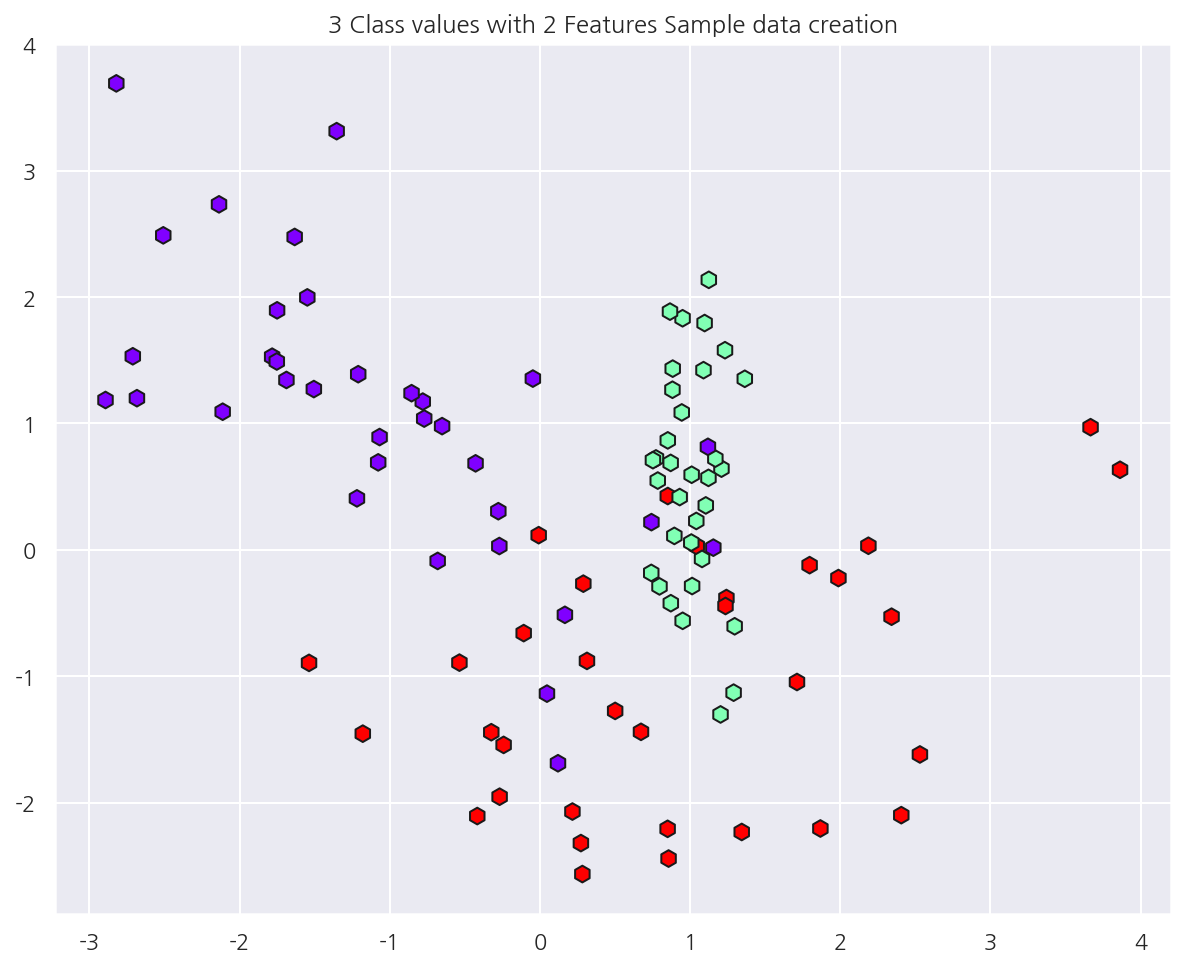

In [12]:
from sklearn.datasets import make_classification

# 피처 2개, 클래스 3개인 가상 데이터
X_features, y_labels = make_classification(n_features = 2, n_redundant = 0, n_informative = 2, 
                                           n_classes = 3, n_clusters_per_class = 1, random_state = 0)

x1 = X_features[:,0]
x2 = X_features[:,1]

# 시각화
plt.scatter(x1 ,x2 , marker="h", c=y_labels, cmap='rainbow', s=70, edgecolor ="k")

plt.title("3 Class values with 2 Features Sample data creation")
plt.show()

### 1.4.2 과적합 문제 시각화

**결정 트리 경계 시각화 함수**

In [13]:
def visualize_boundary(model, X, y):
    fig, ax = plt.subplots()
    
    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # model 학습 
    model.fit(X, y)
    
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

- 책의 부록으로 제공되는 [소스 코드](https://github.com/wikibook/ml-definitive-guide/tree/master/4%EC%9E%A5)를 사용하였다.

**트리 생성 제약이 없는 경우**

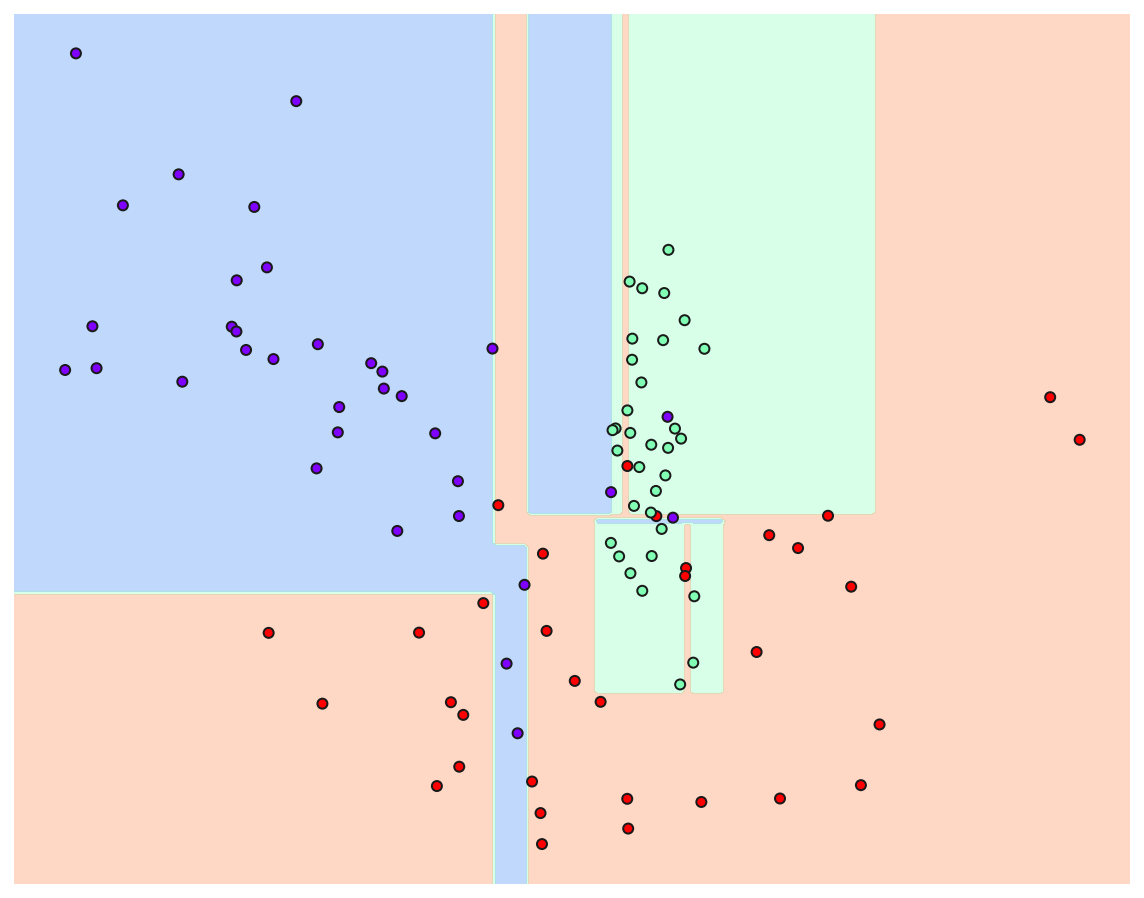

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state = 10)
dt_clf.fit(X_features, y_labels)

visualize_boundary(dt_clf, X_features, y_labels)

- 이상치 데이터까지 분류하기 위해 분기가 자주 일어나면서 결정 기준 경계가 많아진 것을 확인 할 수 있다.


- 즉, 주어진 데이터에 맞추어 과적합 된 상태이며 이는 새로운 데이터에 대해서는 예측 정확도가 떨어질 수 밖에 없다.

**트리 생성 제약이 있는 경우**

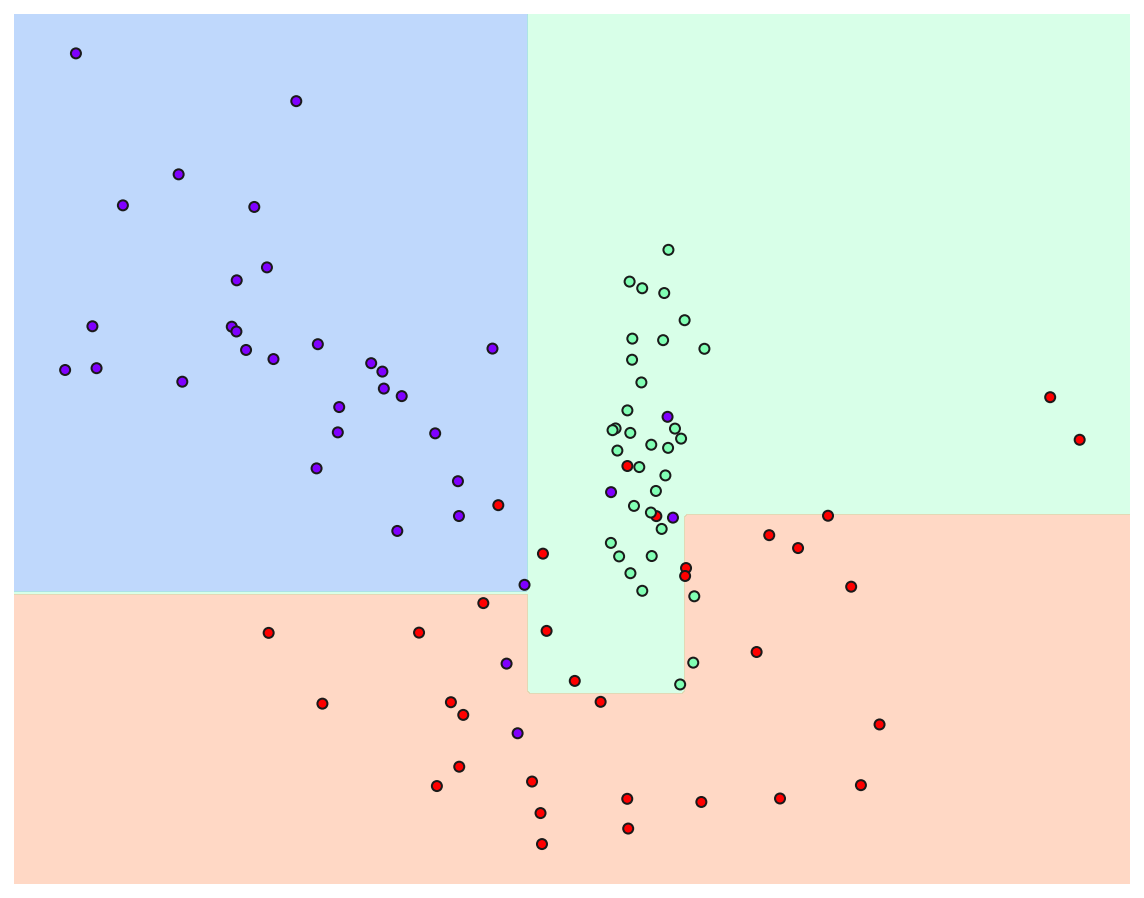

In [15]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state = 10, min_samples_leaf=6)
dt_clf.fit(X_features, y_labels)

visualize_boundary(dt_clf, X_features, y_labels)

- mean_samples_leaf를 6으로 설정하여 제약이 없는 경우에 비해 일반화된 분류 규칙에 따라 분류함을 알 수 있다.

## 1.5 결정 트리 실습

### 1.5.1 데이터 설명

실습 데이터는 [UCI 머신러닝 리포지토리](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones)에서 제공하는 사용자 행동 인식(Human Activity Recognition) 데이터를 사용한다.

해당 데이터는 30명에게 스마트폰 센서를 장착한 뒤 사람의 동작과 관련된 여러 가지 피처를 수집한 데이터이다.

### 1.5.2 데이터 불러오기

**피처 정보 불러오기**

In [16]:
feature_name_df = pd.read_csv("./Human_activity/features.txt", sep="\s+", header=None,
                               names = ["Column_Index", "Column_name"])

# feature_name_df.shape[0]
feature_name_df.head()

,Column_Index,Column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


- features.txt에는 561개의 피처 Index와 피처명이 저장되어 있다.


- 주의할 점으로 features.txt에는 중복된 피처명이 존재하며 이를 이용하여 데이터를 로드시 오류가 발생한다.

**피처명 중복 확인**

In [17]:
temp = feature_name_df.groupby("Column_name").count().sort_values(by="Column_Index", ascending=False)
feature_dup = temp[temp["Column_Index"] > 1]

print("중복된 피처 수:", feature_dup.count()[0])
feature_dup.head()

중복된 피처 수: 42


,Column_Index
Column_name,
"fBodyAccJerk-bandsEnergy()-9,16",3
"fBodyAccJerk-bandsEnergy()-1,16",3
"fBodyGyro-bandsEnergy()-1,8",3
"fBodyGyro-bandsEnergy()-17,24",3
"fBodyGyro-bandsEnergy()-17,32",3


**피처명 중복 제거**

In [18]:
def get_new_feature_name(old_feature_name_df):
    # cumcount()로 피처명별로 중복 존재시 숫자 부여, reset_index()로 Column_Index 생성
    feature_dup = pd.DataFrame(old_feature_name_df.groupby("Column_name").cumcount()).reset_index()
    
    # features.txt의 Column_Index는 1부터 시작이므로 동일하게 설정
    feature_dup.columns = ["Column_Index", "dup_cnt"]
    feature_dup["Column_Index"] = feature_dup["Column_Index"] + 1
    
    # Column_Index를 기준으로 Merge 후 중복컬럼명 변경
    temp = pd.merge(old_feature_name_df, feature_dup, on = "Column_Index", how="outer")
    temp["Column_name"] = temp.apply(lambda x: x.Column_name + "_" + str(x.dup_cnt) if x.dup_cnt > 0 
                                     else x.Column_name, axis=1)
    
    return temp

- 만약 x라는 컬럼명이 3개 있다면 x, x_1, x_2로 변경하는 함수 생성

In [19]:
check = get_new_feature_name(feature_name_df)
check[check.dup_cnt>0].tail(3)

,Column_Index,Column_name,dup_cnt
499,500,"fBodyGyro-bandsEnergy()-49,64_2",2
500,501,"fBodyGyro-bandsEnergy()-1,24_2",2
501,502,"fBodyGyro-bandsEnergy()-25,48_2",2


- 컬럼명은 잘 변경되었으며, 유의할 점은 dup_cnt값이 2라는 건 fetures.txt에 해당 피처는 총 3(2+1)개 존재한다는 것이다.

**데이터 불러오기 함수**

In [20]:
def get_human_dataset():
    # 피처명 불러오기
    feature_name_df = pd.read_csv("./Human_activity/features.txt", sep="\s+", header=None,
                               names = ["Column_Index", "Column_name"])
    # 피처명 중복 수정
    new_feature_name = get_new_feature_name(feature_name_df)
    
    # 리스트로 변경
    feature_name = new_feature_name["Column_name"].tolist()
    
    # train, test 피처 데이터(X), 레이블 데이터(y) 로드
    X_train = pd.read_csv("./Human_activity/train/X_train.txt", sep="\s+", names = feature_name)
    X_test = pd.read_csv("./Human_activity/test/X_test.txt", sep="\s+", names = feature_name)
    
    y_train = pd.read_csv("./Human_activity/train/y_train.txt", sep="\s+", names = ["action"])
    y_test = pd.read_csv("./Human_activity/test/y_test.txt", sep="\s+", names = ["action"])
    
    return X_train, X_test, y_train, y_test

**데이터 불러오기**

In [21]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


- train 데이터는 7352개의 레코드와 561개의 피처로 이루어져 있으며 모든 피처가 float 형태이므로 카테코리 인코딩 작업은 필요없다.

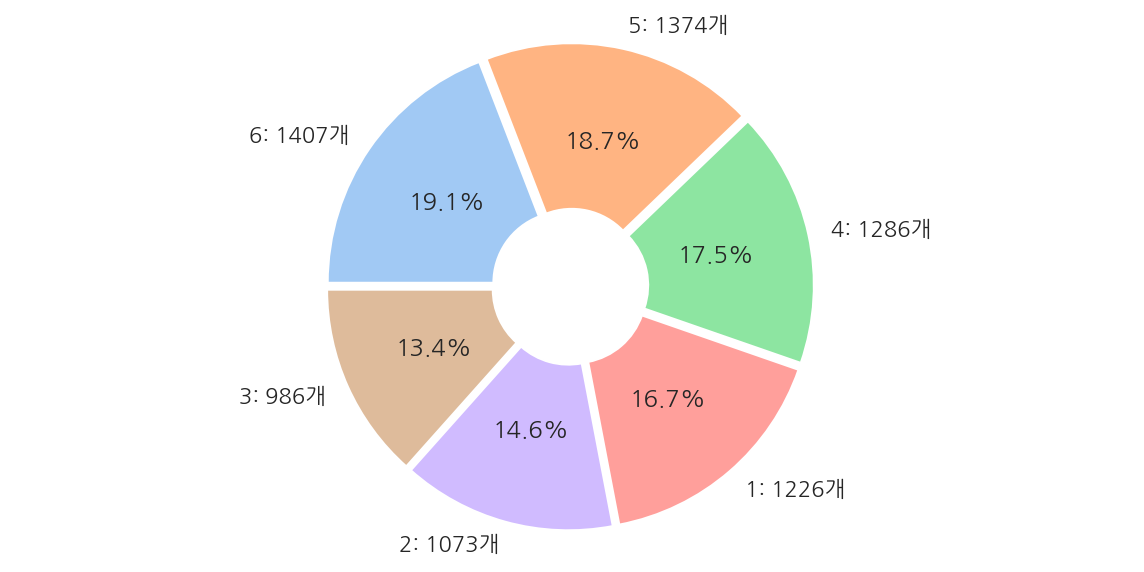

In [23]:
plt.figure(figsize=(10,5))

frequency = y_train['action'].value_counts()

label = []
for key, value in frequency.to_dict().items():
    label.append(f"{key}: {value}개")

plt.pie(frequency,
    startangle = 180,
    counterclock = False,
    explode = [0.03] * len(label),
    autopct = '%1.1f%%',
    labels = label,
    colors = sns.color_palette('pastel', len(label)),
    wedgeprops = dict(width=0.7)
  )


plt.axis('equal')
plt.show()

- 레이블 값은 6개의 클래스로 구성되어 있고 비교적 고르게 분포되어 있다.

### 1.5.3 성능 평가

#### 1.5.3.1 하이퍼 파라미터 디폴트 성능 평가

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 하이퍼 파라미터는 디폴트 값
dt_clf = DecisionTreeClassifier(random_state = 1017)

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print(f"결정 트리 예측 정확도: {accuracy:.4f}")
print(f"\nDecisionTreeClassifier 기본 하이퍼 파라미터:\n{dt_clf.get_params()}")

결정 트리 예측 정확도: 0.8527

DecisionTreeClassifier 기본 하이퍼 파라미터:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 1017, 'splitter': 'best'}


- 약 85.27%의 정확도를 나타내고 있다.

#### 1.5.3.2 하이퍼 파라미터별 성능 평가

In [25]:
max_depth_lst = [6, 8, 10, 12, 16, 18, 20, 24]

# 하이퍼 파라미터별 예측 정확도
for depth in max_depth_lst:
    dt_clf = DecisionTreeClassifier(random_state = 1017, max_depth = depth)

    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)

    print(f"하이퍼 파라미터 max_depth = {depth}, 결정 트리 예측 정확도: {accuracy:.4f}")

하이퍼 파라미터 max_depth = 6, 결정 트리 예측 정확도: 0.8554
하이퍼 파라미터 max_depth = 8, 결정 트리 예측 정확도: 0.8704
하이퍼 파라미터 max_depth = 10, 결정 트리 예측 정확도: 0.8649
하이퍼 파라미터 max_depth = 12, 결정 트리 예측 정확도: 0.8653
하이퍼 파라미터 max_depth = 16, 결정 트리 예측 정확도: 0.8565
하이퍼 파라미터 max_depth = 18, 결정 트리 예측 정확도: 0.8527
하이퍼 파라미터 max_depth = 20, 결정 트리 예측 정확도: 0.8527
하이퍼 파라미터 max_depth = 24, 결정 트리 예측 정확도: 0.8527


- max_depth가 8일때 예측 정확도가 87.04%로 가장 높았고 이후 감소하는 형태이다.

#### 1.5.3.3 GridSearchCV 성능 평가

**깊이 조건**

In [26]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터
params = {"max_depth": [6, 8, 10, 12, 16, 18, 20, 24]}

dt_clf = DecisionTreeClassifier(random_state = 1017)

# GridSearchCV
# verbose는 반복시 마다 수행 결과 메시지를 출력한다.
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring="accuracy", cv=5, verbose=1)
grid_cv.fit(X_train, y_train)

print("GridSearchCV 최적 하이퍼 파라미터:", grid_cv.best_params_)
print("GridSearchCV 최고 평균 정확도:", grid_cv.best_score_.round(4))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.6min finished


GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 10}
GridSearchCV 최고 평균 정확도: 0.8554


- max_depth가 10일때 5개의 폴드의 평균 정확도가 85.54%로 가장 높았다.

In [27]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[["param_max_depth", "mean_test_score"]]

,param_max_depth,mean_test_score
0,6,0.847255
1,8,0.853518
2,10,0.855427
3,12,0.848217
4,16,0.845767
5,18,0.846992
6,20,0.849031
7,24,0.849847


- max_depth가 10을 넘어서면 평균 정확도가 떨어진 것을 확인할 수 있다.


- 깊이를 너무 증가시키면 train 데이터는 올바르게 예측하겠지만 test 데이터는 과적합으로 인해 잘 예측하지 못한다.


- 앞서 폴드 없이 하이퍼 파라미터를 변경하면서 train 데이터로 학습 후 test 데이터의 예측 정확도를 구한 것과 달리

    현재 GridSearchCV에선 test 데이터는 사용하지 않고 train 데이터를 3개의 폴드로 나눠 그 안에서 test 데이터를 설정하기에 정확도 값에는 차이가 있다.    

**깊이 조건, 최소 분할 샘플 조건**

In [28]:
# 하이퍼 파라미터
params = {
    "max_depth": [8, 12, 16, 20], 
    "min_samples_split": [16, 24]
}

dt_clf = DecisionTreeClassifier(random_state = 1017)

# GridSearchCV
# verbose는 반복시 마다 수행 결과 메시지를 출력한다.
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring="accuracy", cv=5, verbose=1)
grid_cv.fit(X_train, y_train)

print("GridSearchCV 최적 하이퍼 파라미터:", grid_cv.best_params_)
print("GridSearchCV 최고 평균 정확도:", grid_cv.best_score_.round(4))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.7min finished


GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}
GridSearchCV 최고 평균 정확도: 0.8565


- max_depth와 min_samples_split 조건을 주었을 때 각각 8, 16이 최적 하이퍼 파라미터로 확인된다.


- 해당 최적 하이퍼 파라미터로 test 데이터에 대해 예측 정확도를 확인한다.

In [29]:
# 최적 하이퍼 파라미터로 예측
best_dt_clf = grid_cv.best_estimator_
pred1 = best_dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)

print(f"결정 트리 예측 정확도: {accuracy:.4f}")

결정 트리 예측 정확도: 0.8714


- 최적 하이퍼 파라미터로 test 데이터에 대한 예측 정확도를 구했을 때 약 87.17%로 

    처음 하이퍼 파라미터를 디폴트 값으로 하였을 때 85.27%보다 상승된 것을 확인 할 수 있다.

### 1.5.4 피처별 중요도

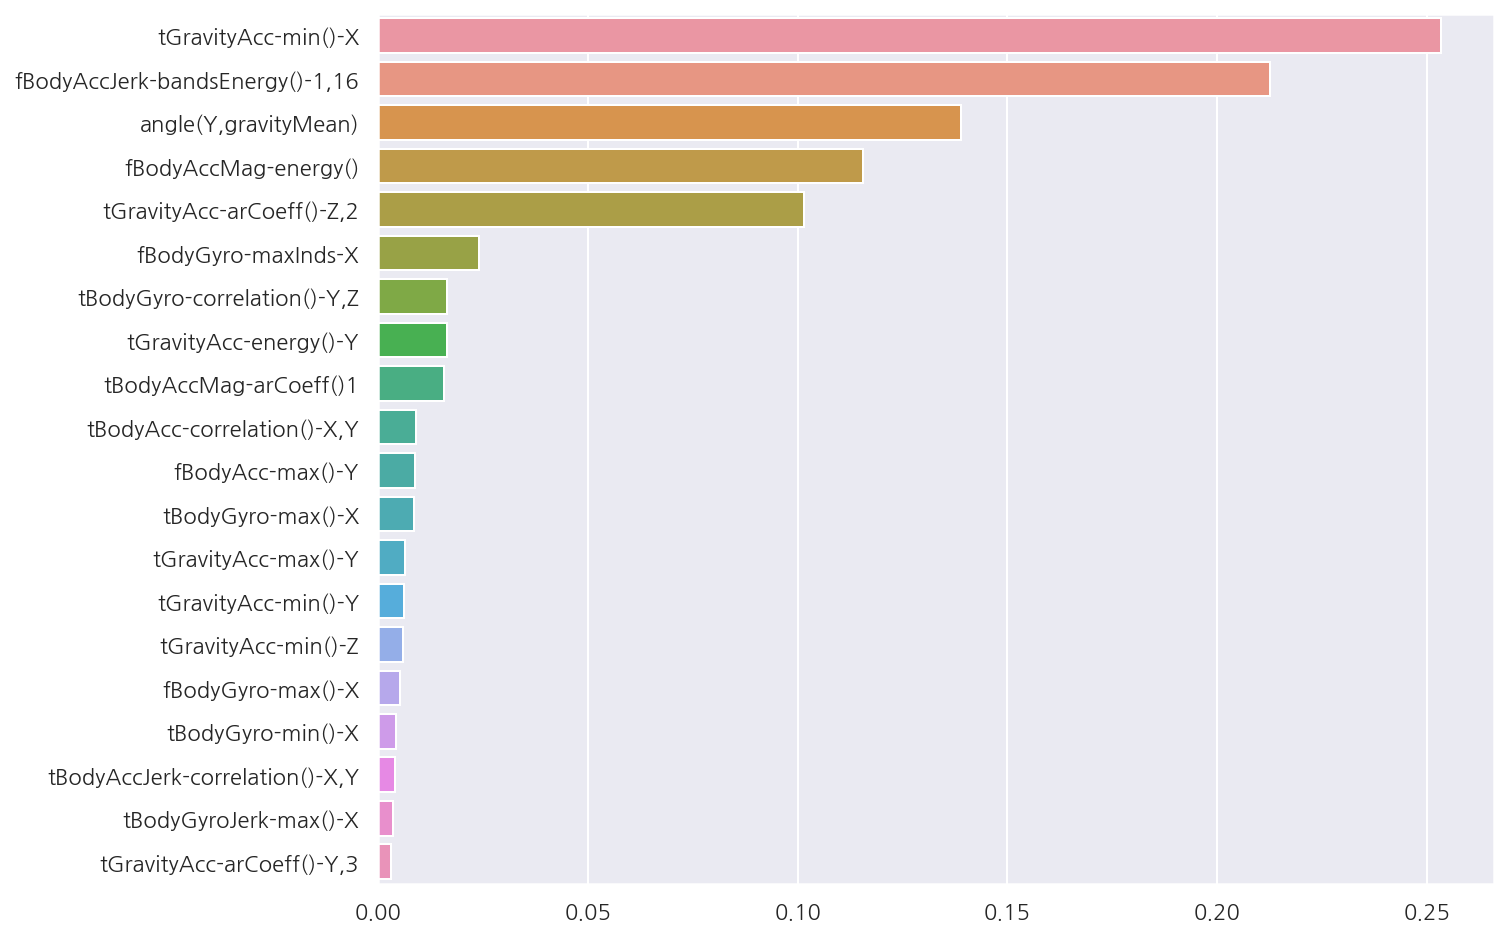

In [30]:
# 피처별 중요도 상위 20개
feature_importances_HAR = best_dt_clf.feature_importances_
feature_importances_HAR = pd.Series(feature_importances_HAR, index = X_train.columns).sort_values(ascending=False)
feature_importances_HAR_top20 = feature_importances_HAR[:20]

# 시각화
sns.barplot(x = feature_importances_HAR_top20, y = feature_importances_HAR_top20.index)
plt.show()

- 중요도 수치 상위 20개를 확인 하였을 때 특히 상위 5개의 피처가 중요도가 높은 것이 확인된다.